In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [3]:
tf.config.experimental.list_physical_devices("GPU")

[]

In [4]:
#import data from csv
DataPath="dataset/Training.csv"
data=pd.read_csv(DataPath)
data=data.dropna(axis=1).copy()
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [5]:
numberOfDiseases=data["prognosis"].value_counts()
numberOfDiseases

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [6]:
data["prognosis"].nunique()

41

In [7]:
#one hot encoding of the output
data_one_hot=pd.get_dummies(data)
data_one_hot.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#divide the dataset between inputs and outputs
x=data_one_hot.drop(data_one_hot.columns[132:], axis=1)
y=data_one_hot.drop(data_one_hot.columns[0:132], axis=1)

In [9]:
x.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y.head()

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#train test split
from sklearn.model_selection import train_test_split

In [12]:
trainTestSplit=0.33
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=trainTestSplit)

In [13]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
2293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1822,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4426,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y_test.shape

(1624, 41)

In [15]:
#definition of the model and training

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(Y_train.shape[1], activation="softmax")
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X_train, Y_train, epochs=100, validation_split=0.2)


Epoch 1/100


83/83 [==============================] - 2s 8ms/step - loss: 3.6040 - accuracy: 0.0892 - val_loss: 3.4515 - val_accuracy: 0.1985
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 3.2182 - accuracy: 0.3099 - val_loss: 2.9814 - val_accuracy: 0.3803
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 2.6599 - accuracy: 0.5224 - val_loss: 2.4017 - val_accuracy: 0.5727
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 2.0636 - accuracy: 0.6597 - val_loss: 1.8204 - val_accuracy: 0.7136
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 1.5175 - accuracy: 0.7982 - val_loss: 1.3076 - val_accuracy: 0.8818
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 1.0772 - accuracy: 0.9310 - val_loss: 0.9102 - val_accuracy: 0.9727
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.7500 - accuracy: 0.9784 - val_loss: 0.6228 - val_accuracy: 0.9970
Epoch 8/10

In [16]:
#evaluate the model 
model.evaluate(X_test, Y_test)

51/51 [==============================] - 0s 2ms/step - loss: 2.6664e-04 - accuracy: 1.0000


[0.00026663768221624196, 1.0]

In [17]:
#test on single prediction
input_data = np.expand_dims(X_test.iloc[100], axis=0)
prediction=model.predict(input_data)
y.columns[np.argmax(prediction)],Y_test.iloc[100].idxmax()

1/1 [==============================] - 0s 108ms/step


('prognosis_Hepatitis E', 'prognosis_Hepatitis E')

In [18]:
preds=model.predict(X_test)
#adjust type in output
max = preds.max(axis=1).reshape(-1, 1)
preds = np.where(preds == max, 1, 0)
Y_test = Y_test.astype(int).to_numpy()
#evaluate the predictions
m=tf.keras.metrics.Accuracy()
m.update_state(Y_test, preds)
m.result().numpy()

51/51 [==============================] - 0s 2ms/step


1.0

In [36]:
rnd=np.random.randint(0, Y_test.shape[1])

preds_human_readable=y.columns[(np.argmax(preds, axis=1))].to_numpy()
Y_test_human_readable=y.columns[(np.argmax(Y_test, axis=1))].to_numpy()
preds_human_readable, Y_test_human_readable

(array(['prognosis_Paralysis (brain hemorrhage)',
        'prognosis_Varicose veins', 'prognosis_Drug Reaction', ...,
        'prognosis_Heart attack', 'prognosis_Chronic cholestasis',
        'prognosis_Pneumonia'], dtype=object),
 array(['prognosis_Paralysis (brain hemorrhage)',
        'prognosis_Varicose veins', 'prognosis_Drug Reaction', ...,
        'prognosis_Heart attack', 'prognosis_Chronic cholestasis',
        'prognosis_Pneumonia'], dtype=object))

Accuracy on train data: 100.0%


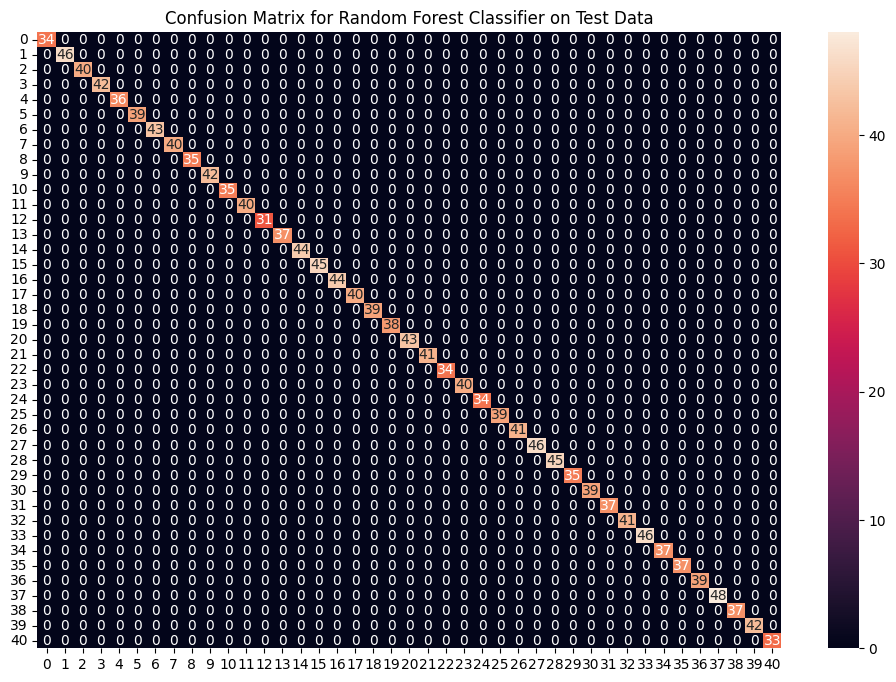

In [37]:
print(f"Accuracy on train data\
: {m.result().numpy()*100}%")
 
cf_matrix = confusion_matrix(Y_test_human_readable, preds_human_readable)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()